In [44]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from mrmr import mrmr_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
class_counts = df['price_range'].value_counts()
print(class_counts)

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


# Min max normalization

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
target = df['price_range']
features = df.iloc[:,:-1]
df_scaled = pd.DataFrame(scaler.fit_transform(features), columns = features.columns)


In [7]:
df_scaled

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0


# Feature engineering- calculating mRMR values

In [8]:
X = df_scaled
y = target

selected_features = mrmr_classif(X=X, y=y, K=20,return_scores=True)

for i in selected_features:
    print(i)

100%|██████████| 20/20 [00:16<00:00,  1.23it/s]

['ram', 'battery_power', 'px_width', 'mobile_wt', 'int_memory', 'px_height', 'n_cores', 'talk_time', 'm_dep', 'sc_h', 'touch_screen', 'four_g', 'fc', 'clock_speed', 'sc_w', 'blue', 'dual_sim', 'pc', 'wifi', 'three_g']
battery_power      31.598158
blue                0.476768
clock_speed         0.493708
dual_sim            0.428239
fc                  0.772182
four_g              1.059525
int_memory          2.922996
m_dep               1.500682
mobile_wt           3.594318
n_cores             2.625415
pc                  0.825446
px_height          19.484842
px_width           22.620882
ram              3520.110824
sc_h                2.225984
sc_w                1.671000
talk_time           1.628811
three_g             0.457320
touch_screen        1.293302
wifi                0.284940
dtype: float64
               battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       0.001000  0.001000     0.001000  0.001000  0.001000   
blue                0.011252  0.00100

In [9]:
selected_features = mrmr_classif(X=X, y=y, K=5)

for i in selected_features:
    print(i)
#pixel height is redundant with pixel width    


100%|██████████| 5/5 [00:00<00:00, 25.13it/s]

ram
battery_power
px_width
mobile_wt
int_memory


# Visualization

In [10]:
for x in df_scaled:
    if x not in selected_features:
        df_scaled.drop(x, axis=1, inplace=True)
        
df_scaled = pd.concat([df_scaled,target],axis=1)
df_scaled

,battery_power,int_memory,mobile_wt,px_width,ram,price_range
0,0.227789,0.080645,0.900000,0.170895,0.612774,1
1,0.347361,0.822581,0.466667,0.993324,0.634687,2
2,0.041416,0.629032,0.541667,0.811749,0.627205,2
3,0.076152,0.129032,0.425000,0.858478,0.671566,2
4,0.881764,0.677419,0.508333,0.475300,0.308658,1
...,...,...,...,...,...,...
1995,0.195725,0.000000,0.216667,0.927904,0.110102,0
1996,0.977956,0.596774,0.891667,0.977971,0.474613,2
1997,0.941884,0.548387,0.233333,0.755674,0.748530,3
1998,0.675351,0.709677,0.541667,0.113485,0.163816,0


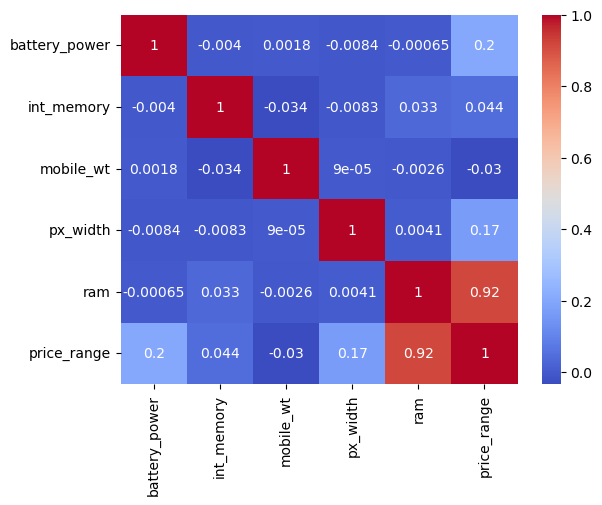

In [11]:
corr_matrix = df_scaled.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

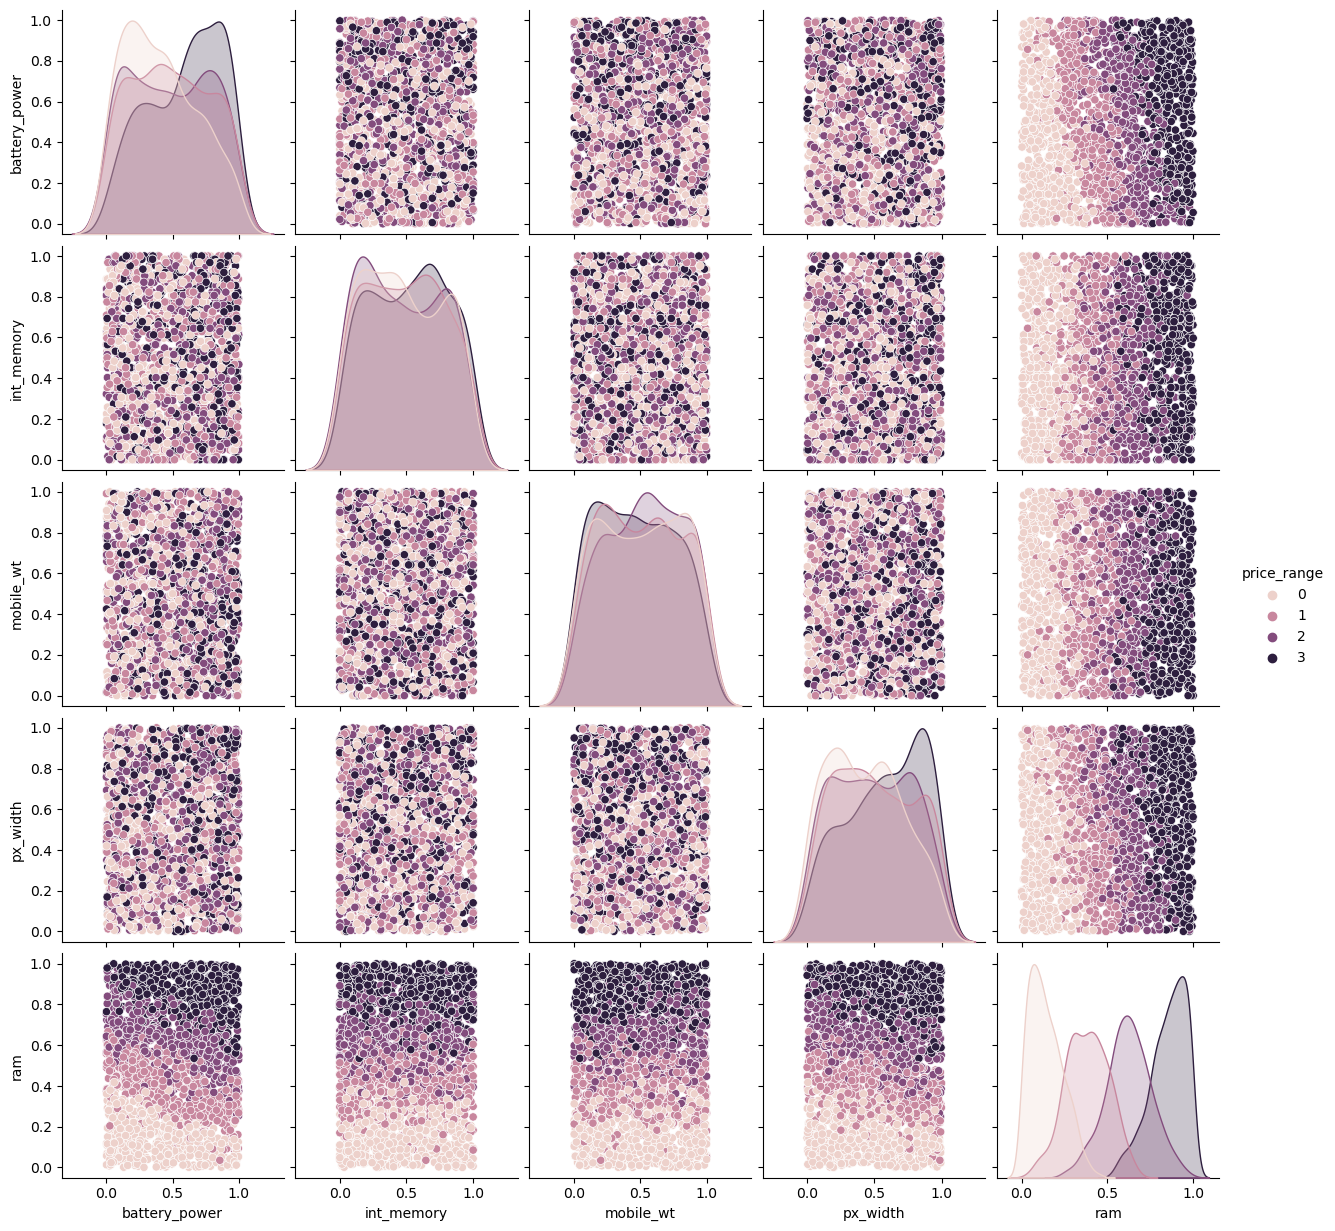

In [12]:
sns.pairplot(df_scaled, hue='price_range')
plt.show()

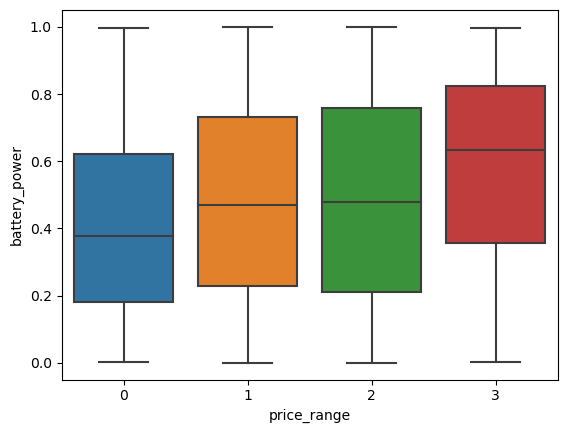

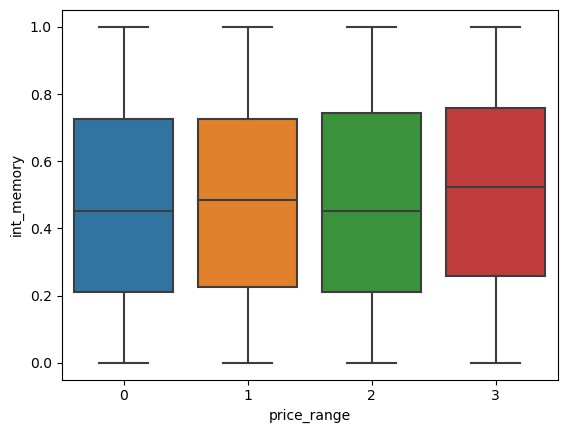

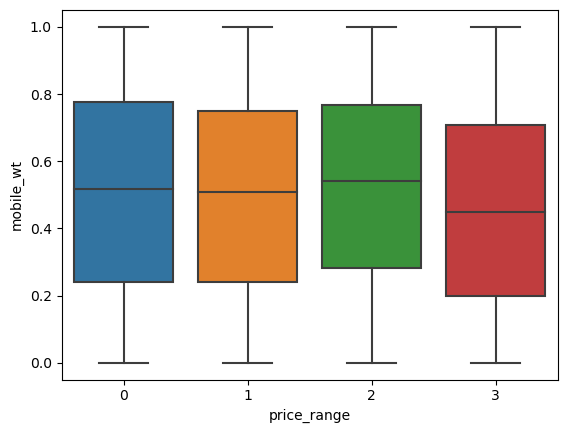

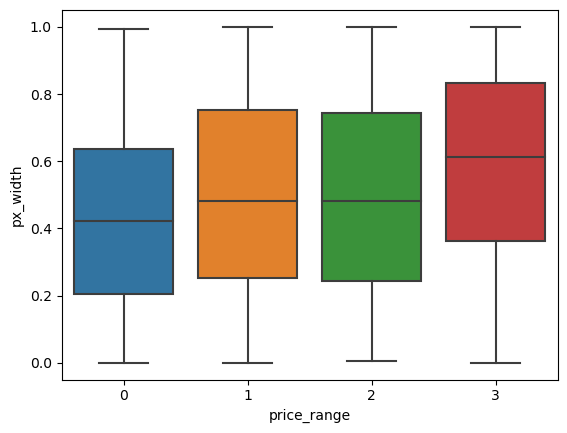

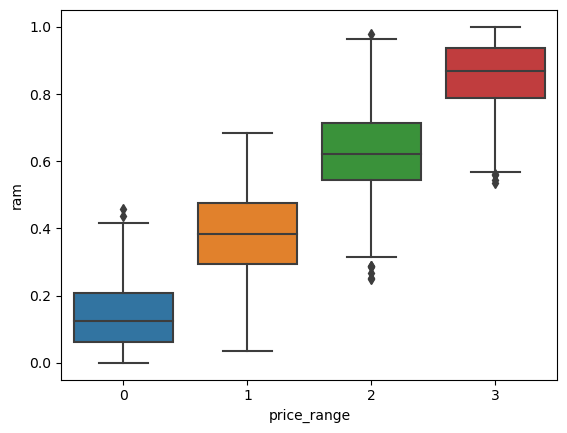

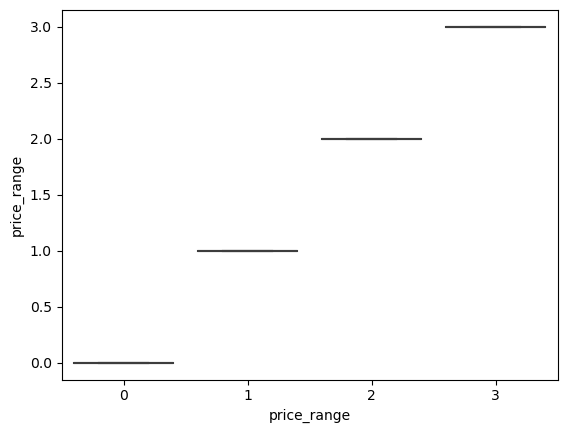

In [14]:
for feat in df_scaled:
    sns.boxplot(x='price_range',y=feat, data=df_scaled)
    plt.show()


# Classificaiton

In [15]:
X = df_scaled.drop('price_range',axis = 1)
y = df_scaled['price_range']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 16)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [29]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors= 16, p=2,
           weights='uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=16)

In [30]:
knn.score(X_test,y_test)

0.8325

In [20]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

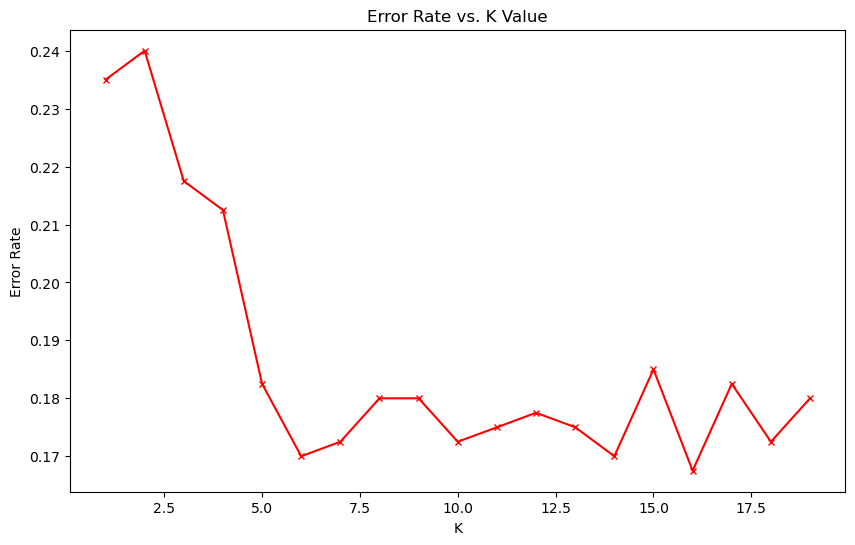

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='red', marker='x',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [32]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [33]:
logmodel.score(X_test,y_test)

0.8925

# Decision tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [35]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
dtree.score(X_test,y_test)

0.815

# Random forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [42]:
rfc.score(X_test,y_test)

0.8625

# Naive Bayes 

In [45]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


# Logistic regression chosen 

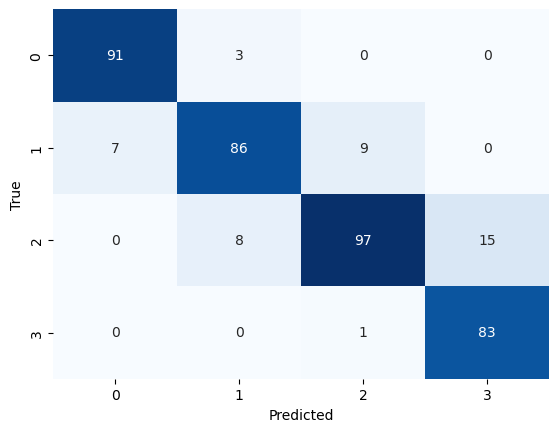

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, logmodel.predict(X_test))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        94
           1       0.89      0.84      0.86       102
           2       0.91      0.81      0.85       120
           3       0.85      0.99      0.91        84

    accuracy                           0.89       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.89      0.89      0.89       400

